In [108]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [94]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']


In [95]:
name='https://raw.githubusercontent.com/avhadutgadhave/MLOP-s-POC-AWS/master/iris.csv'
data = pd.read_csv(name, names=CSV_COLUMN_NAMES)

In [96]:
data['Species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: Species, dtype: int64

In [97]:
# preprocess the data
Species={'setosa':0,'versicolor':1,'virginica':2}
data.Species=[Species[item] for item in data.Species]

In [98]:
data.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


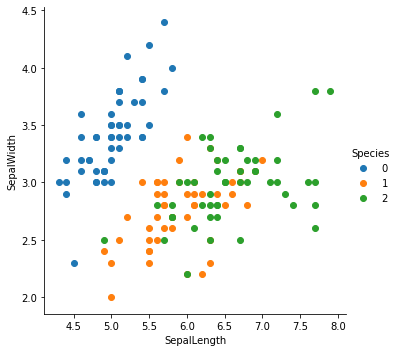

In [100]:
sns.FacetGrid(data,hue='Species',size=5).map(plt.scatter,'SepalLength','SepalWidth').add_legend()

In [70]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [106]:
knn=KNeighborsClassifier(n_neighbors=1)
a=knn.fit(X,y)


In [115]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

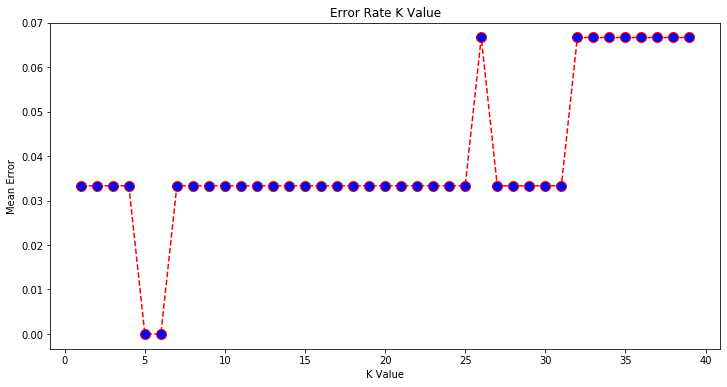

In [111]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [105]:
data_y = data.pop('Species')

# The label column has now been removed from the features.
data.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
def input_evaluation_set():
    features = {'SepalLength': np.array([6.4, 5.0]),
                'SepalWidth':  np.array([2.8, 2.3]),
                'PetalLength': np.array([5.6, 3.3]),
                'PetalWidth':  np.array([2.2, 1.0])}
    labels = np.array([2, 1])
    return features, labels

In [56]:
def input_fn(features, labels, training=True, batch_size=256):
    """An input function for training or evaluating"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)


In [57]:
# Feature columns describe how to use the input.
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))


In [59]:
# Build a DNN with 2 hidden layers with 30 and 10 hidden nodes each.
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
     hidden_units=[50, 50, 50],
    n_classes=3)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpzzl4aig7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2783b03f28>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [60]:
# Train the Model.
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpzzl4aig7/model.ckpt.
INFO:tensorflow:loss = 337.49963, step = 1
INFO:tensorflow:global_step/sec: 124.786
INFO:tensorflow:loss = 48.756725, step = 101 (0.809 sec)
INFO:tensorflow:global_step/sec: 242.612
INFO:tensorflow:loss = 14.548338, step = 201 (0.413 sec)
INFO:tensorflow:global_step/sec: 172.357
INFO:tensorflow:loss = 15.863766, step = 301 (0.577 sec)
INFO:tensorflow:global_step/sec: 174.917
INFO:tensorflow:loss = 11.6875925, step = 401 (0.573 sec)
INFO:tensorflow:global_step/sec: 280.423
INFO:tensorflow:loss = 12.913763, step = 501 (0.356 sec)
INFO:tensorflow:global_step/sec: 180.588
INFO:tensorflow:loss = 11.162772, step = 601 (0.558 sec)
INFO:tensorflow:global_step/sec: 123.467
INFO:tensorflow

INFO:tensorflow:global_step/sec: 272.23
INFO:tensorflow:loss = 7.2872906, step = 1801 (0.367 sec)
INFO:tensorflow:global_step/sec: 295.036
INFO:tensorflow:loss = 6.7216983, step = 1901 (0.342 sec)
INFO:tensorflow:global_step/sec: 295.595
INFO:tensorflow:loss = 13.411897, step = 2001 (0.337 sec)
INFO:tensorflow:global_step/sec: 288.574
INFO:tensorflow:loss = 7.10386, step = 2101 (0.344 sec)
INFO:tensorflow:global_step/sec: 253.976
INFO:tensorflow:loss = 8.8460455, step = 2201 (0.393 sec)
INFO:tensorflow:global_step/sec: 310.338
INFO:tensorflow:loss = 8.514275, step = 2301 (0.326 sec)
INFO:tensorflow:global_step/sec: 300.012
INFO:tensorflow:loss = 7.6182246, step = 2401 (0.333 sec)
INFO:tensorflow:global_step/sec: 292.651
INFO:tensorflow:loss = 8.485878, step = 2501 (0.342 sec)
INFO:tensorflow:global_step/sec: 280.78
INFO:tensorflow:loss = 11.479111, step = 2601 (0.353 sec)
INFO:tensorflow:global_step/sec: 293.613
INFO:tensorflow:loss = 4.3674555, step = 2701 (0.340 sec)
INFO:tensorflow:

In [62]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-29T17:11:15Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzzl4aig7/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-11-29-17:11:16
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.96666664, average_loss = 0.18642831, global_step = 5000, loss = 5.5928493
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmpzzl4aig7/model.ckpt-5000

Test set accuracy: 0.967



In [45]:
# Generate predictions from the model
expected = ['Setosa', 'Versicolor', 'Virginica']
predict_x = {
    'SepalLength': [5.4, 5.3, 6.3],
    'SepalWidth': [3.7, 3.3, 3.3],
    'PetalLength': [1.8, 4.4, 5.3],
    'PetalWidth': [0.3, 1.3, 2.3],
}


In [73]:
def input_fn(features, batch_size=256):
    """An input function for prediction."""
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)


In [74]:
predictions = classifier.predict(
    input_fn=lambda: input_fn(predict_x))

In [75]:
for pred_dict, expec in zip(predictions, expected):
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%), expected "{}"'.format(
        SPECIES[class_id], 100 * probability, expec))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzzl4aig7/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Setosa" (100.0%), expected "Setosa"
Prediction is "Versicolor" (100.0%), expected "Versicolor"
Prediction is "Virginica" (100.0%), expected "Virginica"
